In [2]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

/home/user/miniconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/user/miniconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
def onehot(labels):
    n_sample = len(labels)
    n_class = max(labels) + 1
    onehot_labels = np.zeros((n_sample, n_class))
    onehot_labels[np.arange(n_sample), labels] = 1

    return onehot_labels

In [4]:
def dropout(nodes, drop_probability):
    keep_probability = 1 - drop_probability
    if keep_probability == 0:
        return tf.zeros_like(nodes)
    
    mask = tf.random_uniform(tf.shape(nodes)) < keep_probability
    mask = tf.cast(mask, dtype=tf.float32)
    return tf.divide(tf.multiply(mask, nodes), keep_probability)

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((-1, 784)) /255
train_labels = onehot(train_labels)
test_images = test_images.reshape((-1, 784)) / 255
test_labels = onehot(test_labels)

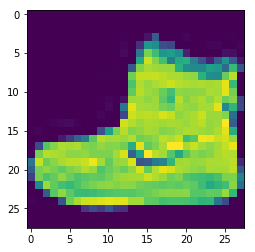

In [6]:
plt.imshow(train_images[0].reshape((28,28)))

In [7]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [8]:
labels = {0: 'T-shirt', 
          1: 'Trouser', 
          2: 'pullover', 
          3: 'Dress', 
          4: 'Coat',
          5: 'Sandal',
          6: 'Shirt',
          7: 'Sneaker',
          8: 'Bag',
          9: 'Ankle boot'}

In [14]:
x = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.float32, shape=(None, 10))

w1 = tf.Variable(tf.random_normal(shape=(784, 256), stddev=0.01))
b1 = tf.Variable(tf.zeros(shape=(256)))
w2 = tf.Variable(tf.random_normal(shape=(256, 256), stddev=0.01))
b2 = tf.Variable(tf.zeros(shape=(256)))
w3 = tf.Variable(tf.random_normal(shape=(256, 10), stddev=0.01))
b3 = tf.Variable(tf.zeros(shape=(10)))

hidden_layer1 = tf.nn.relu(tf.add(tf.matmul(x, w1), b1))
hidden_layer1 = dropout(hidden_layer1, 0.2)
hidden_layer2 = tf.nn.relu(tf.add(tf.matmul(hidden_layer1, w2), b2))
hidden_layer2 = dropout(hidden_layer2, 0.5)
pred = tf.add(tf.matmul(hidden_layer2, w3), b3)

In [15]:
learning_rate = 0.05
epochs = 10
batch_size = 300

In [16]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=pred))
train = tf.train.AdagradOptimizer(learning_rate).minimize(loss)

correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [17]:
dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
dataset = dataset.repeat().shuffle(batch_size).batch(batch_size)
iterator = dataset.make_initializable_iterator()
next_data = iterator.get_next()

In [ ]:
train_losses, test_losses = [], []
init = [tf.global_variables_initializer(), iterator.initializer]
with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        total_loss = 0
        for _ in range(200):
            batch_x, batch_y = sess.run(next_data)
            _, l = sess.run([train, loss], feed_dict={
                x: batch_x,
                y: batch_y
            })        
            total_loss += l
        train_acc, train_loss = sess.run([accuracy, loss], feed_dict={
            x: train_images,
            y: train_labels
        })
        test_acc, test_loss = sess.run([accuracy, loss], feed_dict={
            x: test_images,
            y: test_labels
        })
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        print('epoch {}. loss: {:.4f}. train accuracy: {:.4f}. test accuracy: {:.4f}'.format(i+1, total_loss/200, train_acc, test_acc))

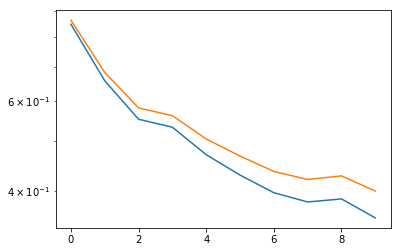

In [21]:
plt.semilogy(train_losses)
plt.semilogy(test_losses)

In [22]:
with tf.Session() as sess:
    sess.run(init)
    batch_x, batch_y = sess.run(next_data)


In [25]:
batch_x.shape

(300, 784)

In [26]:
batch_y.shape

(300, 10)

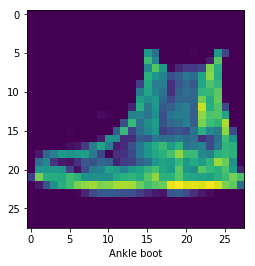

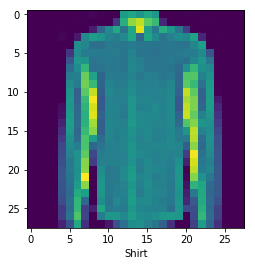

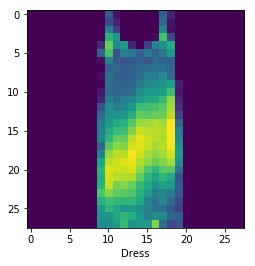

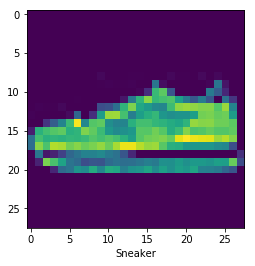

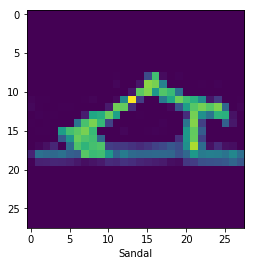

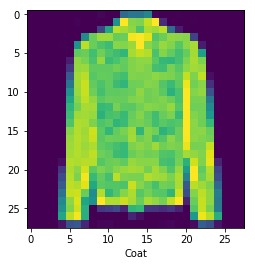

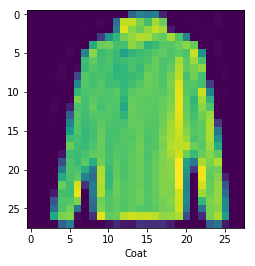

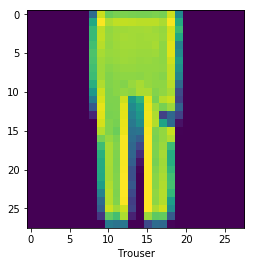

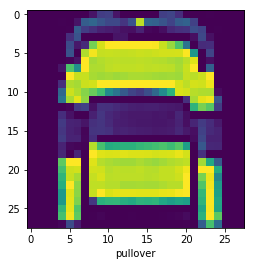

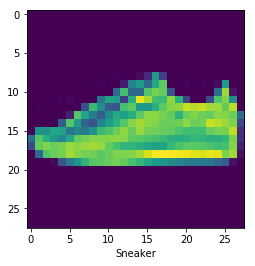

In [37]:
for i in range(10):
    plt.figure()
    plt.imshow(batch_x[i].reshape((28, 28)))
    plt.xlabel(labels[np.argmax(batch_y[i])])

9